In [1]:
import os
import sys
import glob
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
os.chdir('/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('max_colwidth', 400)

# Helper Functions

#### read hichip-inferred peaks files

In [2]:
def read_peak_files(file):
    peak_data = {}
    count = 0
    with open(file) as fr:
        for line in fr:
            info = line.strip().split()
            peak_info = info[0:3]
            peak_data[count] = peak_info
            count = count + 1
    return(peak_data)

#### read chip-seq peaks files

In [3]:
def read_chipseq_files(file):
    peak_data = {}
    count = 0
    with open(file) as fr:
        for line in fr:
            info = line.strip().split()
            peak_info = info[0:3]
            peak_data[count] = peak_info
            count = count + 1
    return(peak_data)

In [4]:
def get_chipseq_path(samplesheet, sample_name):
    path=''
    with open(samplesheet) as fr:
        for line in fr:
            if sample_name in line:
                info = line.strip().split()
                path = info[4]
    return(path) 

#### generate pandas dataframe 

In [7]:
def generate_df():
    data = []
    glob_str = 'results/hicpro/*Homo_S*/hic_results'
    
    for file in glob.glob(glob_str):
        sample_name = file.split('/')[2]
        sample_info = []
        sample_info.append(sample_name)
        
        ## HiChIP-Peaks peaks
        hichip_peaks_path='results/peaks/hichip-peaks/{sn}/out_peaks.bed'.format(sn = sample_name)
        if os.path.exists(hichip_peaks_path):
            peak_info = read_peak_files(hichip_peaks_path)
            sample_info.append(len(peak_info))
            peak_sizes = []
            for peak in peak_info.items():
                peak_sizes.append(int(int(peak[1][2])-int(peak[1][1])))
            sample_info.append(np.mean(peak_sizes))
        else:
            sample_info.append(0)
            sample_info.append(0)
            
        ## FitHiChIP peaks
        fithichip_path='results/peaks/fithichip/{sn}/MACS2_ExtSize/out_macs2_peaks.narrowPeak'.format(sn = sample_name)
        if os.path.exists(fithichip_path):
            peak_info = read_peak_files(fithichip_path)
            sample_info.append(len(peak_info))
            peak_sizes = []
            for peak in peak_info.items():
                peak_sizes.append(int(int(peak[1][2])-int(peak[1][1])))
            sample_info.append(np.mean(peak_sizes))
        else:
            sample_info.append(0)
            sample_info.append(0)
        
        ## Chip-seq peaks
        chip_path=get_chipseq_path('results/samplesheets/post-hicpro/human.peaks_files.samplesheet.without_header.tsv', sample_name)
        if os.path.exists(chip_path):
            peak_info = read_chipseq_files(chip_path)
            sample_info.append(len(peak_info))
            peak_sizes = []
            for peak in peak_info.items():
                peak_sizes.append(int(int(peak[1][2])-int(peak[1][1])))
            sample_info.append(np.mean(peak_sizes))
            sample_info.append(os.path.basename(chip_path))
        else:
            sample_info.append(0)
            sample_info.append(0)
            sample_info.append('N/A')
        
        data.append(sample_info)
            
    df = pd.DataFrame(data)
    return df

# Generate Pandas Dataframe

In [8]:
df = generate_df()

/mnt/BioHome/kfetter/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/mnt/BioHome/kfetter/.local/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [9]:
df.columns = ["sample_name", "num_peaks_hichip_peaks","avg_peak_size_hichip_peaks", "num_peaks_fithichip","avg_peak_size_fithichip", "num_peaks_chipseq","avg_peak_size_chipseq", "chipseq_path"]
df = df.sort_values(by=["sample_name"], ascending=True).reset_index(drop=True)
df

,sample_name,num_peaks_hichip_peaks,avg_peak_size_hichip_peaks,num_peaks_fithichip,avg_peak_size_fithichip,num_peaks_chipseq,avg_peak_size_chipseq,chipseq_path
0,293T-PDS.GSE128106.Homo_Sapiens.YY1.b1,968,18837.628099,29430,174.444852,19491,9279.021087,FINAL_IDR_Peaks_FDR0.05.txt
1,293T-TMPYP4.GSE128106.Homo_Sapiens.YY1.b1,1801,29690.376458,73184,187.952298,21727,4880.460901,FINAL_IDR_Peaks_FDR0.05.txt
2,293T.GSE128106.Homo_Sapiens.YY1.b1,43,21189.976744,987,183.697062,21267,8636.245263,FINAL_IDR_Peaks_FDR0.05.txt
3,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,2661,1281.321308,11489,265.430151,115154,630.902669,A673-siCT-Dh1-72h.GSE156650.Homo_Sapiens.CTCF.b1.macs2_peaks.narrowPeak_Q0.01filt
4,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,3468,1323.914360,10428,255.292386,115154,630.902669,A673-siCT-Dh1-72h.GSE156650.Homo_Sapiens.CTCF.b1.macs2_peaks.narrowPeak_Q0.01filt
5,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,823,1086.366950,7761,265.823734,102935,615.880789,A673-siSA2-Dh6-72h.GSE156650.Homo_Sapiens.CTCF.b1.macs2_peaks.narrowPeak_Q0.01filt
6,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,2205,1375.680726,23228,247.107327,102935,615.880789,A673-siSA2-Dh6-72h.GSE156650.Homo_Sapiens.CTCF.b1.macs2_peaks.narrowPeak_Q0.01filt
7,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,49,2554.061224,9018,207.311377,104318,601.596963,A673-siSA2-Dh8-72h.GSE156650.Homo_Sapiens.CTCF.b1.macs2_peaks.narrowPeak_Q0.01filt
8,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,46,1515.434783,27484,216.063164,104318,601.596963,A673-siSA2-Dh8-72h.GSE156650.Homo_Sapiens.CTCF.b1.macs2_peaks.narrowPeak_Q0.01filt
9,A673_SA1m1.GSE133227.Homo_Sapiens.CTCF.b1,29585,2240.566571,60295,386.202189,0,0.000000,N/A


In [10]:
has_chipseq = df.loc[df['num_peaks_chipseq'] != 0]
print(len(has_chipseq))
has_inferred = has_chipseq.loc[df['num_peaks_fithichip'] != 0]
low = ((has_inferred.num_peaks_hichip_peaks < 5000) | (has_inferred.num_peaks_fithichip < 5000) | (has_inferred.num_peaks_chipseq < 5000))
#has_inferred[low].drop(columns=['avg_peak_size_hichip_peaks', 'avg_peak_size_fithichip', 'avg_peak_size_chipseq']).reset_index(drop=True)

243


In [11]:
df.to_excel("human.peaks_1.30.23.xlsx")

In [39]:
hicpro="results/samplesheets/hicpro/current.hicpro.samplesheet.without_header.tsv"
files="results/samplesheets/post-hicpro/human.peaks_files.samplesheet.without_header.tsv"

with open(hicpro) as h, open(files) as f:
    samples_f = f.readlines()
    hicpro = h.readlines()
    with_chipseq = []
    indicies = []
    
    for sample in samples_f:
        if "Not_available" not in sample:
            with_chipseq.append(sample.split('\t')[0])
    
    for sample in with_chipseq:
        index = 1
        for line in hicpro:
            if line.split('\t')[0] == sample:
                indicies.append(index)
            index = index + 1

indicies.sort()
indicies_final = [ str(i) for i in indicies ]
print(len(indicies_final))
print((',').join(indicies_final))
                
                
                
        

31
9,10,15,16,17,18,68,69,70,71,72,73,74,75,76,77,78,79,80,83,84,87,88,97,98,120,121,122,123,146,147


# Generate Sample-Specific Plots

#### peak sizes

In [13]:
def get_outliers(ps_df):
    
    Q1 = ps_df['peak_sizes_bp'].quantile(0.25)
    Q3 = ps_df['peak_sizes_bp'].quantile(0.75)
    IQR = Q3 - Q1
    lower_lim = Q1 - 1.5 * IQR
    upper_lim = Q3 + 1.5 * IQR
    print("Outliers Report")
    print("IQR:", IQR)
    
    outliers_low = ps_df.peak_sizes_bp < lower_lim
    outliers_high = ps_df.peak_sizes_bp > upper_lim
    outliers_low_df = ps_df.loc[outliers_low,:]
    outliers_high_df = ps_df.loc[outliers_high,:]
    print("num_outliers_low:", len(outliers_low_df))
    print("num_outliers_high:", len(outliers_high_df))
    print("percent_total_peaks_that_are_outliers:", round(((len(outliers_high_df) + len(outliers_low_df)) / len(ps_df) * 100), 2), "%")
    
    ps_df_no_outliers = ps_df[~(outliers_low | outliers_high)]
    
    return ps_df_no_outliers

In [26]:
def gen_peak_sizes_plot(sample_name, peak_type):
    
    if peak_type == "FitHiChIP": 
        peaks_path = 'results/peaks/fithichip/{sn}/MACS2_ExtSize/out_macs2_peaks.narrowPeak'.format(sn = sample_name)
    if peak_type == "HiChIP_Peaks":
        peaks_path = 'results/peaks/hichip-peaks/{sn}/out_peaks.bed'.format(sn = sample_name)
    if peak_type == "ChIP_Seq":
        peaks_path = get_chipseq_path('results/samplesheets/post-hicpro/peaks_files.samplesheet.without_header.tsv', sample_name)
        
    if os.path.exists(peaks_path):
        if peak_type == "FithiChIP" or peak_type == "HiChIP_Peaks": 
            peak_info = read_peak_files(peaks_path)    
        else:
            peak_info = read_chipseq_files(peaks_path)
            
        peak_sizes = []
        for peak in peak_info.items():
            peak_sizes.append(int(int(peak[1][2])-int(peak[1][1])))
        ps_df = pd.DataFrame(peak_sizes)
        ps_df.columns = ['peak_sizes_bp']
        
    print("Peak Sizes Report (before outliers dropped)")
    print(ps_df.describe())
    print()
    
    ps_df_no_outliers = get_outliers(ps_df)
    
    sns.set(rc = {'figure.figsize':(25,8)})
    sns.set_theme(style="whitegrid")
    font1 = {'color':'black','size':20}
    font2 = {'color':'black','size':15}
    plt.title(peak_type + " Peak Sizes Distribution: " + sample_name + " (Outliers Dropped)", fontdict = font1)
    plt.xlabel("Peak Size (bp)", fontdict = font2)
    plt.ylabel("Number of Samples", fontdict = font2)

    ps_plot = sns.histplot(data=ps_df_no_outliers, bins=100, x="peak_sizes_bp", color='#fa8072')
    fig = ps_plot.get_figure()
    fig.savefig('sample_peak_dist2.png', dpi=300)
    return ps_plot

Peak Sizes Report (before outliers dropped)
       peak_sizes_bp
count   51221.000000
mean     3132.609535
std      3013.077518
min         7.000000
25%      1467.000000
50%      2421.000000
75%      3813.000000
max     78049.000000

Outliers Report
IQR: 2346.0
num_outliers_low: 0
num_outliers_high: 3141
percent_total_peaks_that_are_outliers: 6.13 %


<AxesSubplot:title={'center':'HiChIP_Peaks Peak Sizes Distribution: Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1 (Outliers Dropped)'}, xlabel='Peak Size (bp)', ylabel='Number of Samples'>

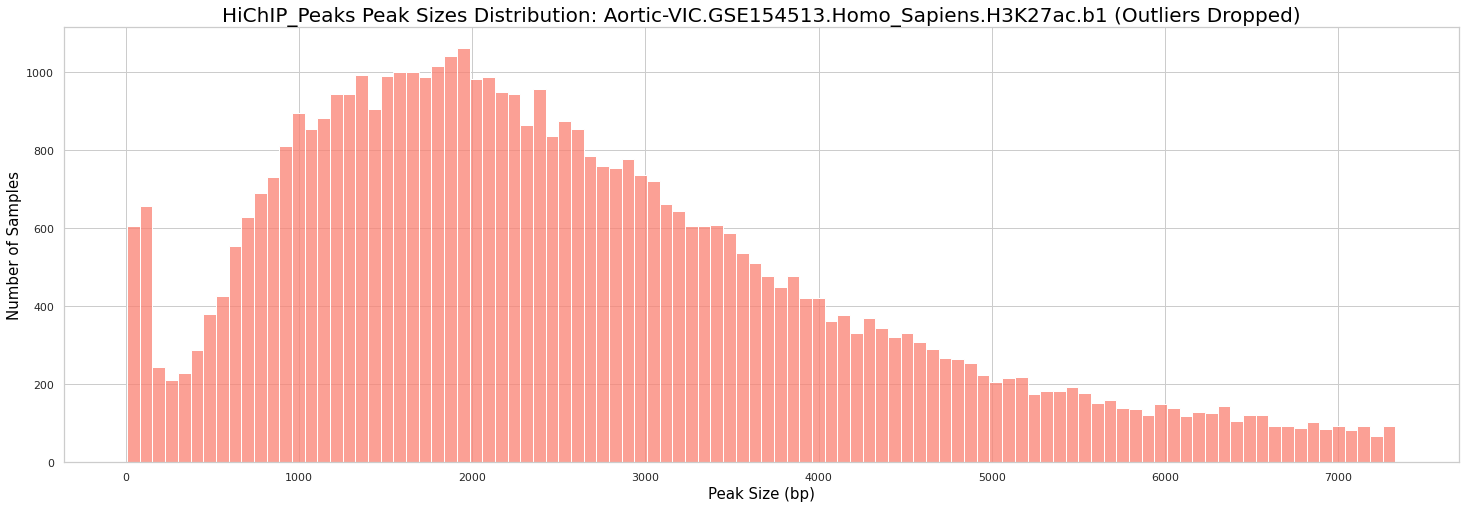

In [21]:
gen_peak_sizes_plot('Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1', 'HiChIP_Peaks')

Peak Sizes Report (before outliers dropped)
       peak_sizes_bp
count  210112.000000
mean      388.569696
std       341.728160
min       147.000000
25%       179.000000
50%       250.000000
75%       440.000000
max      3959.000000

Outliers Report
IQR: 261.0
num_outliers_low: 0
num_outliers_high: 21286
percent_total_peaks_that_are_outliers: 10.13 %


<AxesSubplot:title={'center':'FitHiChIP Peak Sizes Distribution: Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1 (Outliers Dropped)'}, xlabel='Peak Size (bp)', ylabel='Number of Samples'>

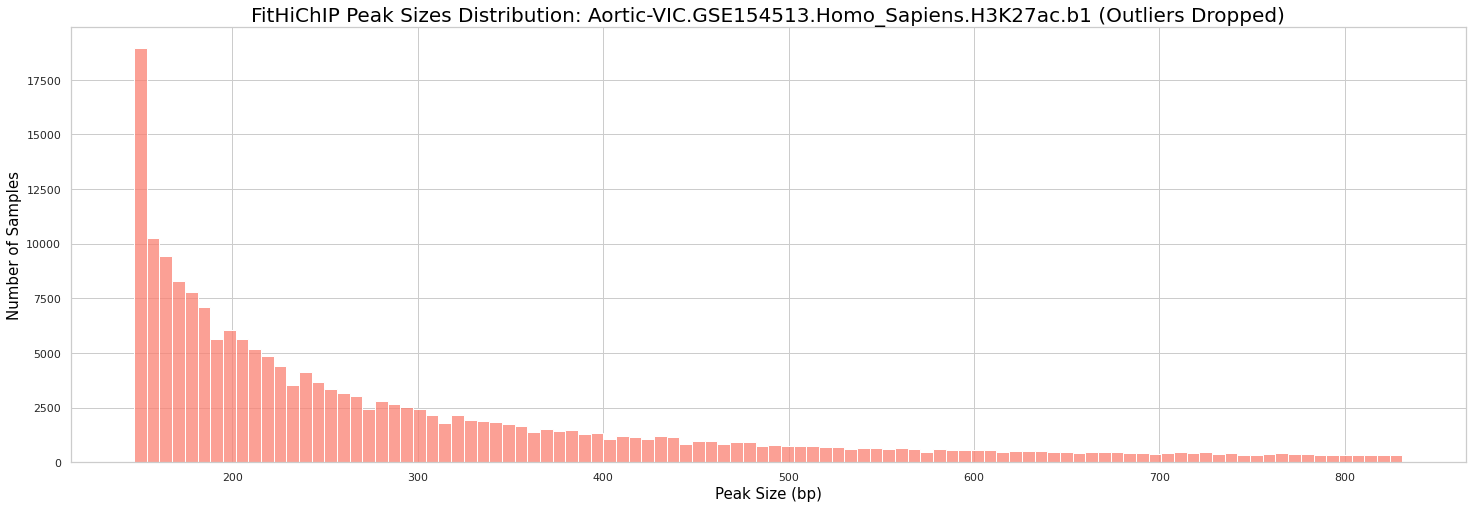

In [25]:
gen_peak_sizes_plot('Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1', 'FitHiChIP')

Peak Sizes Report (before outliers dropped)
       peak_sizes_bp
count  163779.000000
mean      657.534684
std       753.876251
min       200.000000
25%       252.000000
50%       384.000000
75%       726.000000
max     26766.000000

Outliers Report
IQR: 474.0
num_outliers_low: 0
num_outliers_high: 16518
percent_total_peaks_that_are_outliers: 10.09 %


<AxesSubplot:title={'center':'ChIP_Seq Peak Sizes Distribution: Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1 (Outliers Dropped)'}, xlabel='Peak Size (bp)', ylabel='Number of Samples'>

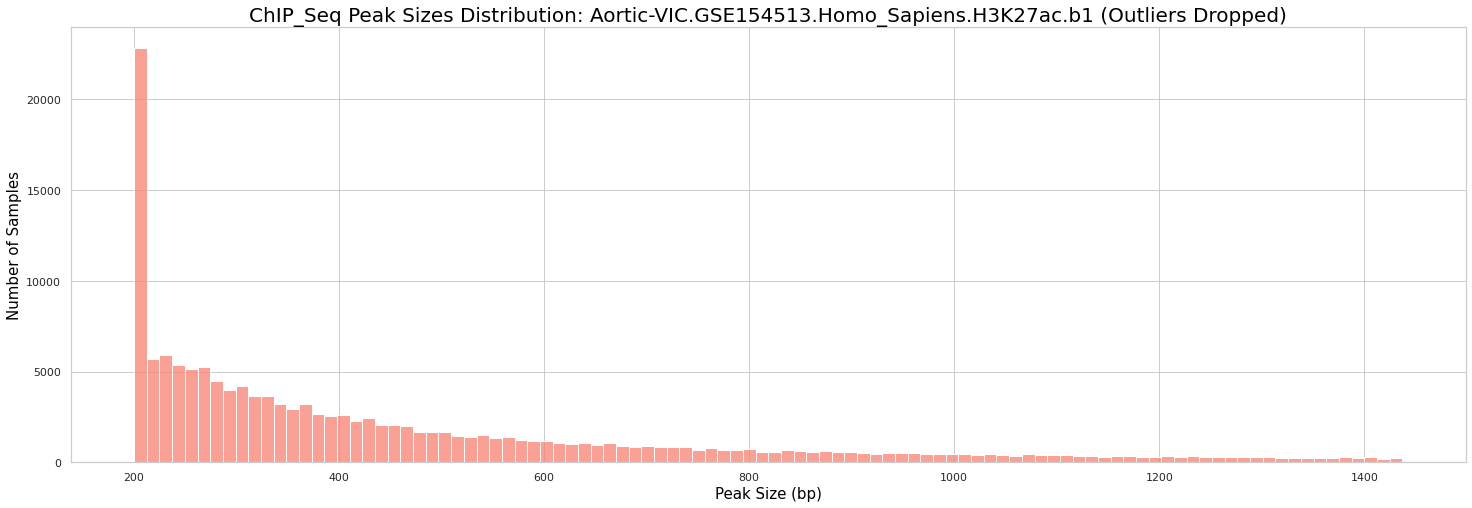

In [27]:
gen_peak_sizes_plot('Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1', 'ChIP_Seq')

#### overlaps, percent recall

In [87]:
def read_overlaps(file):
    overlaps = 0
    with open(file) as fr:
        for line in fr:
            if line.startswith('c'):     
                info = line.strip().split()
                overlaps = overlaps + 1
    return overlaps

In [88]:
def create_overlaps_df():
    data = []
    sample_files = glob.glob('results/peaks/overlaps/no_slop_recall/*')
    samples = []
    for sample in sample_files:
        s = sample.split('/')[4].split('.overlaps')[0]
        if s not in samples:
            samples.append(s)
    
    for s in samples:
        sample_name = s
        sample_info = []
        sample_info.append(sample_name)
        chipseq_file = get_chipseq_path('results/samplesheets/post-hicpro/peaks_files.samplesheet.without_header.tsv', sample_name)
        
        ## read overlaps with hp file
        hp_file = 'results/peaks/overlaps/no_slop_recall/{sn}.overlaps.chipseq.hp.nodups.txt'.format(sn = sample_name)
        if os.path.exists(hp_file):
            num_overlaps = read_overlaps(hp_file)
            num_chipseq_peaks = read_overlaps(chipseq_file)
            
            sample_info.append(num_overlaps)
            sample_info.append(num_chipseq_peaks)
            sample_info.append((num_overlaps / num_chipseq_peaks) * 100)
        
        ## read overlaps with f file
        f_file = 'results/peaks/overlaps/no_slop_recall/{sn}.overlaps.chipseq.f.nodups.txt'.format(sn = sample_name)
        if os.path.exists(f_file):
            num_overlaps = read_overlaps(f_file)
            
            sample_info.append(num_overlaps)
            sample_info.append(num_chipseq_peaks)
            sample_info.append((num_overlaps / num_chipseq_peaks) * 100)
        
        data.append(sample_info)
            
    df = pd.DataFrame(data)
    return df

In [ ]:
o_df = create_overlaps_df()

In [95]:
o_df.columns = ['sample_name', 'num_csp_w_hp_overlap', 'num_csp', '%_recall_hp_csp', 'num_csp_w_f_overlap', 'num_csp', '%_recall_f_csp']
o_df = o_df.sort_values(by=['sample_name'], ascending=True).reset_index(drop=True)
o_df.describe()

,num_csp_w_hp_overlap,num_csp,%_recall_hp_csp,num_csp_w_f_overlap,num_csp,%_recall_f_csp
count,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000
mean,7941.550847,98072.864407,14.012254,6707.076271,98072.864407,13.038284
std,15290.704274,50247.273696,26.015760,12970.841804,50247.273696,24.492064
min,0.000000,38.000000,0.000000,0.000000,38.000000,0.000000
25%,286.000000,61173.000000,0.363033,420.250000,61173.000000,0.371993
50%,2791.500000,99593.000000,3.117808,1252.000000,99593.000000,1.700240
75%,5534.500000,136321.000000,8.245904,5342.250000,136321.000000,10.013001
max,96306.000000,311562.000000,100.000000,75469.000000,311562.000000,98.108313


Text(0, 0.5, 'Percent Recall of ChIP-Seq Peaks by HiChIP-Peaks')

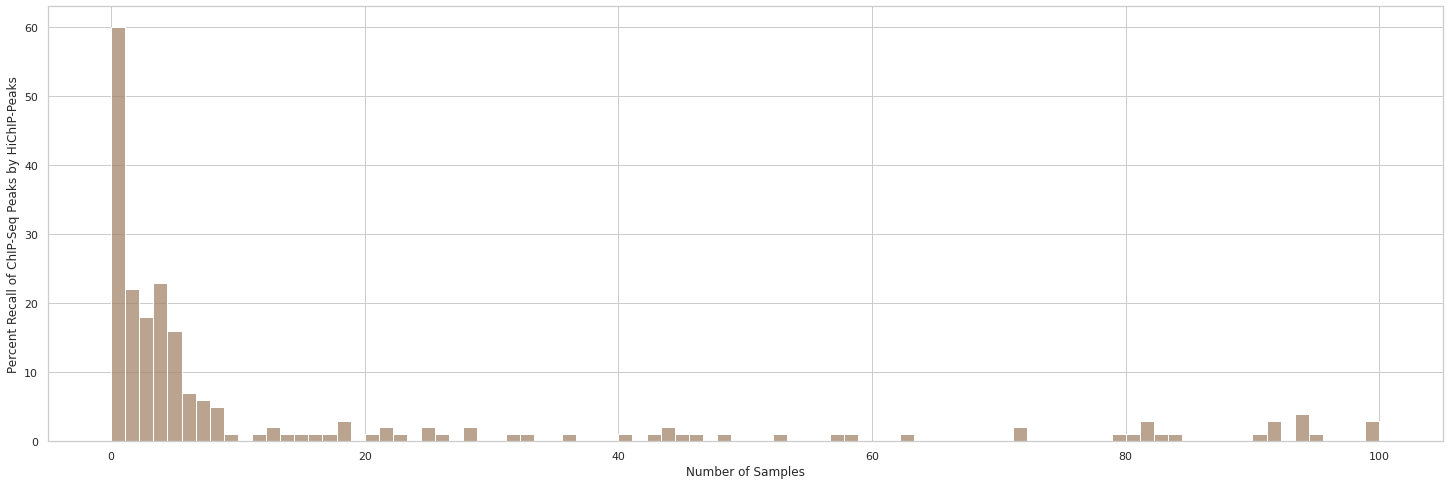

In [69]:
sns.set(rc = {'figure.figsize':(25,8)})
sns.set_theme(style="whitegrid")
ax = sns.histplot(data=o_df, bins=90, x="%_recall_hp_csp", color='#A3866A')
ax.set_xlabel('Number of Samples')
ax.set_ylabel('Percent Recall of ChIP-Seq Peaks by HiChIP-Peaks')

Text(0, 0.5, 'Percent Recall of ChIP-Seq Peaks by FitHiChIP')

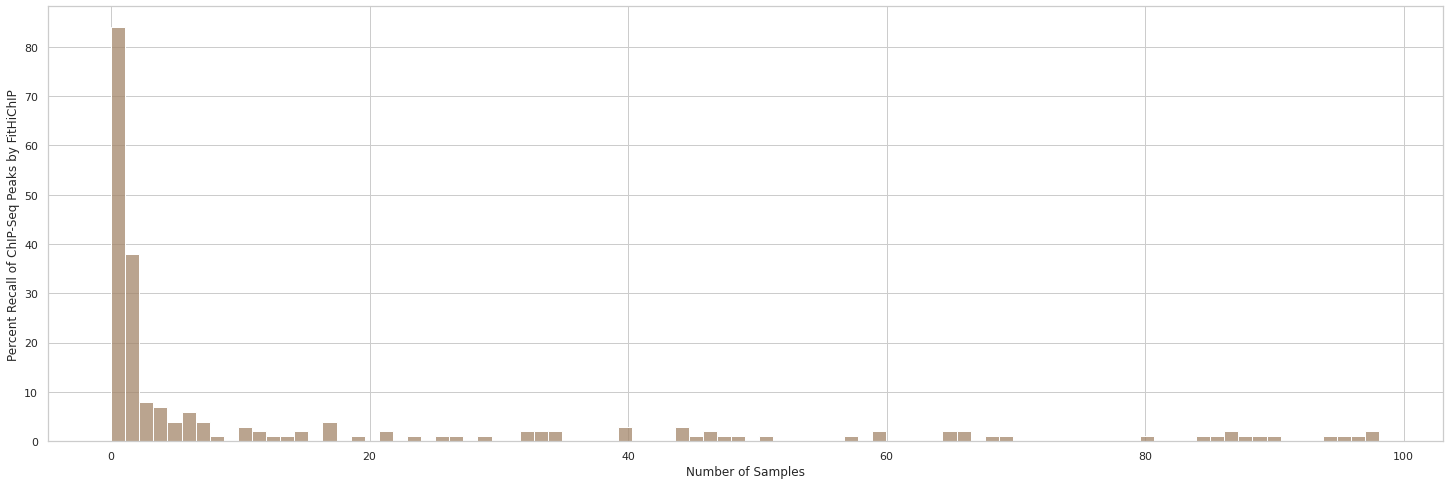

In [71]:
sns.set(rc = {'figure.figsize':(25,8)})
sns.set_theme(style="whitegrid")
ax = sns.histplot(data=o_df, bins=90, x="%_recall_f_csp", color='#A3866A')
ax.set_xlabel('Number of Samples')
ax.set_ylabel('Percent Recall of ChIP-Seq Peaks by FitHiChIP')

# Plotting

In [76]:
# Generate df of avg peak sizes by tool
hp_plot_df = df.loc[df['avg_peak_size_hichip_peaks'] > 0].reset_index(drop=True)
columns = ['sample_name', 'avg_peak_size_hichip_peaks']
hp_plot_df = hp_plot_df[columns]
hp_plot_df.columns = ['Tool', 'Average Peak Size (bp)']
hp_plot_df = hp_plot_df.assign(Tool='HiChIP-Peaks')

fi_plot_df = df.loc[df['avg_peak_size_fithichip'] > 0].reset_index(drop=True)
columns = ['sample_name', 'avg_peak_size_fithichip']
fi_plot_df = fi_plot_df[columns]
fi_plot_df.columns = ['Tool', 'Average Peak Size (bp)']
fi_plot_df = fi_plot_df.assign(Tool='FitHiChIP')

ch_plot_df = df.loc[df['avg_peak_size_chipseq'] > 0].reset_index(drop=True)
columns = ['sample_name', 'avg_peak_size_chipseq']
ch_plot_df = ch_plot_df[columns]
ch_plot_df.columns = ['Tool', 'Average Peak Size (bp)']
ch_plot_df = ch_plot_df.assign(Tool='ChIPLine (Chip-Seq)')

plot_df = pd.concat([hp_plot_df, fi_plot_df, ch_plot_df], ignore_index=True)

In [77]:
# Generate df of number of peaks by tool
hp_num_df = df.loc[df['num_peaks_hichip_peaks'] > 0].reset_index(drop=True)
columns = ['sample_name', 'num_peaks_hichip_peaks']
hp_num_df = hp_num_df[columns]
hp_num_df.columns = ['Tool', 'Number of Peaks']
hp_num_df = hp_num_df.assign(Tool='HiChIP-Peaks')

fi_num_df = df.loc[df['num_peaks_fithichip'] > 0].reset_index(drop=True)
columns = ['sample_name', 'num_peaks_fithichip']
fi_num_df = fi_num_df[columns]
fi_num_df.columns = ['Tool', 'Number of Peaks']
fi_num_df = fi_num_df.assign(Tool='FitHiChIP')

ch_num_df = df.loc[df['num_peaks_chipseq'] > 0].reset_index(drop=True)
columns = ['sample_name', 'num_peaks_chipseq']
ch_num_df = ch_num_df[columns]
ch_num_df.columns = ['Tool', 'Number of Peaks']
ch_num_df = ch_num_df.assign(Tool='ChIPLine (Chip-Seq)')

num_df = pd.concat([hp_num_df, fi_num_df, ch_num_df], ignore_index=True)

In [78]:
# concatenate the above two dfs
com_df = num_df.join(plot_df['Average Peak Size (bp)'])
hichip_peaks = com_df.loc[com_df['Tool'] == 'HiChIP-Peaks']
fithichip = com_df.loc[com_df['Tool'] == 'FitHiChIP']
chipseq = com_df.loc[com_df['Tool'] == 'ChIPLine (Chip-Seq)']
com_df

,Tool,Number of Peaks,Average Peak Size (bp)
0,HiChIP-Peaks,968,18837.628099
1,HiChIP-Peaks,1801,29690.376458
2,HiChIP-Peaks,43,21189.976744
3,HiChIP-Peaks,2661,1281.321308
4,HiChIP-Peaks,3468,1323.914360
...,...,...,...
1182,ChIPLine (Chip-Seq),105996,1244.788728
1183,ChIPLine (Chip-Seq),116678,991.572901
1184,ChIPLine (Chip-Seq),99496,1237.351512
1185,ChIPLine (Chip-Seq),115604,1149.792697


<AxesSubplot:xlabel='Tool', ylabel='Average Peak Size (bp)'>

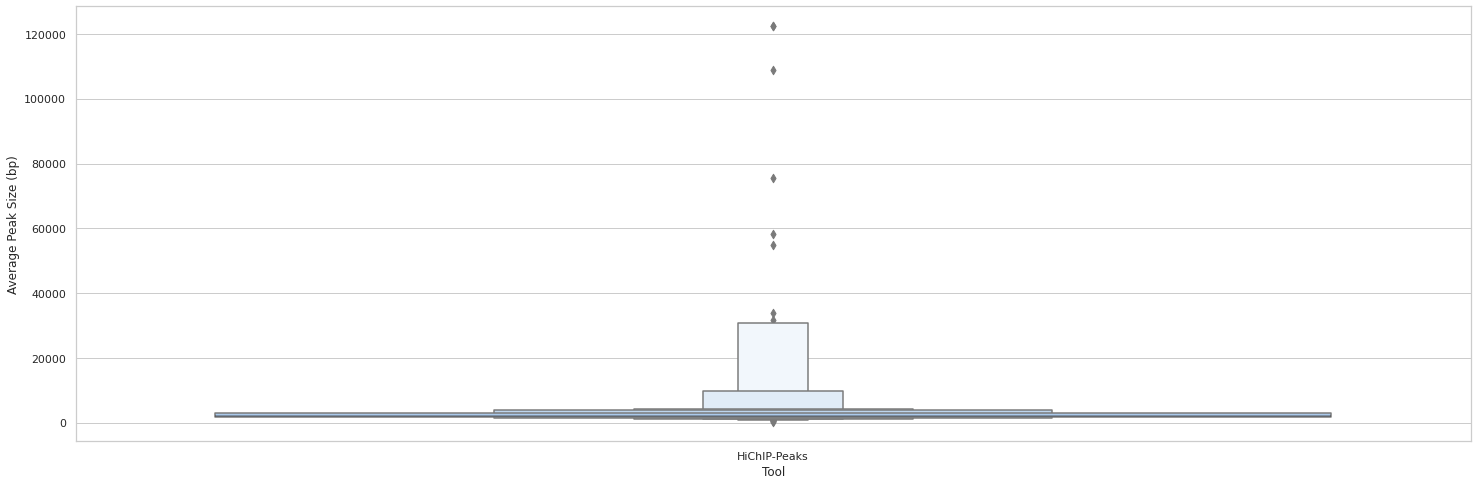

In [79]:
sns.boxenplot(x="Tool", y="Average Peak Size (bp)", data=hichip_peaks, palette="pastel")

<AxesSubplot:xlabel='Tool', ylabel='Average Peak Size (bp)'>

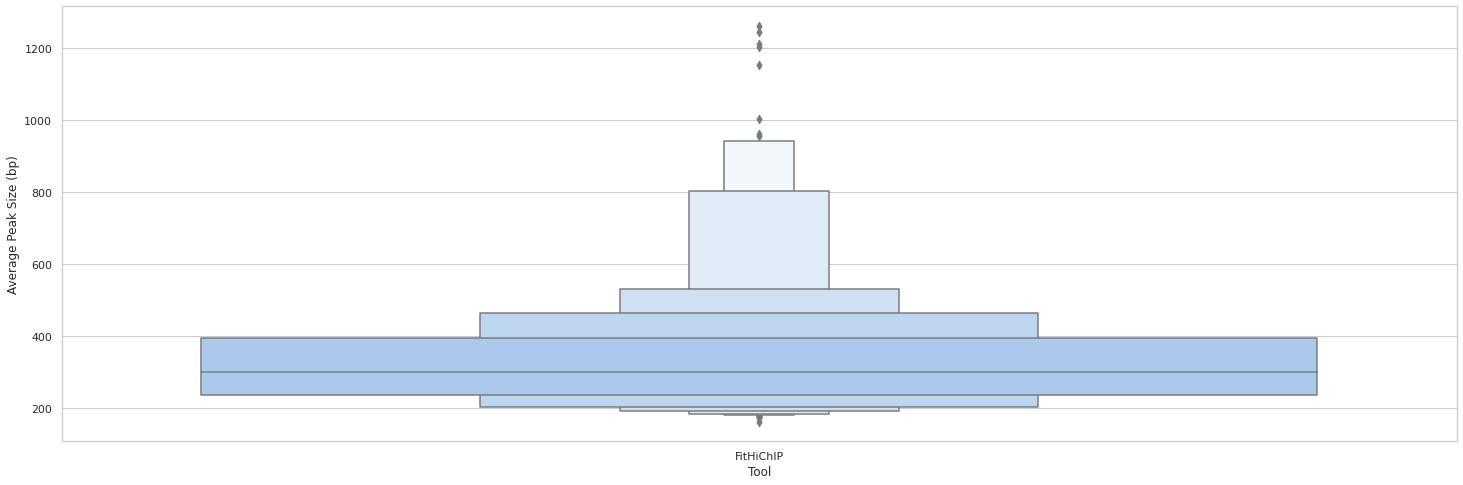

In [80]:
sns.boxenplot(x="Tool", y="Average Peak Size (bp)", data=fithichip, palette="pastel")

<AxesSubplot:xlabel='Tool', ylabel='Average Peak Size (bp)'>

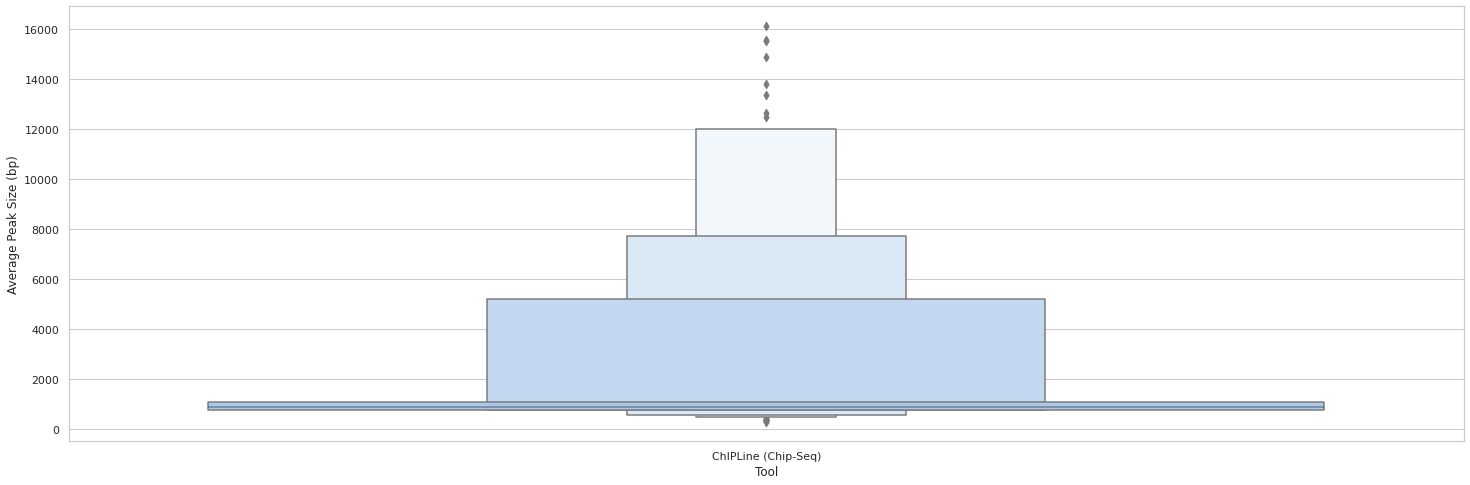

In [81]:
sns.boxenplot(x="Tool", y="Average Peak Size (bp)", data=chipseq, palette="pastel")

<AxesSubplot:xlabel='Tool', ylabel='Average Peak Size (bp)'>

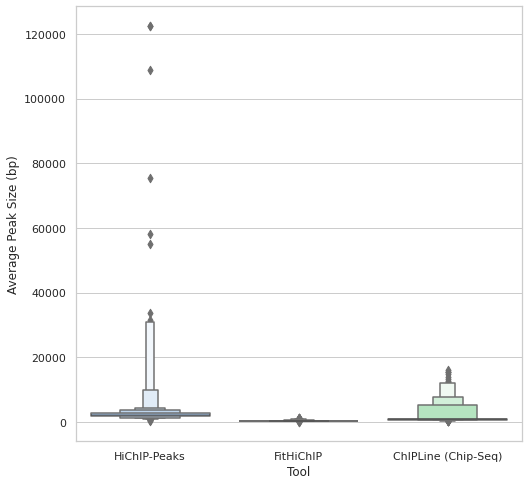

In [82]:
sns.set(rc = {'figure.figsize':(8,8)})
sns.set_theme(style="whitegrid")
sns.boxenplot(x="Tool", y="Average Peak Size (bp)", data=com_df, palette="pastel")

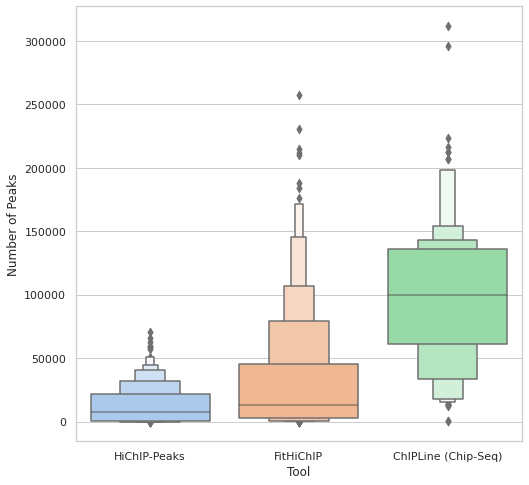

In [83]:
sns.set(rc = {'figure.figsize':(8,8)})
sns.set_theme(style="whitegrid")
ax = sns.boxenplot(x="Tool", y="Number of Peaks", data=com_df, palette="pastel")
fig = ax.get_figure()
fig.savefig('num_of_peaks.png', dpi=300)

<AxesSubplot:xlabel='Number of Peaks', ylabel='Count'>

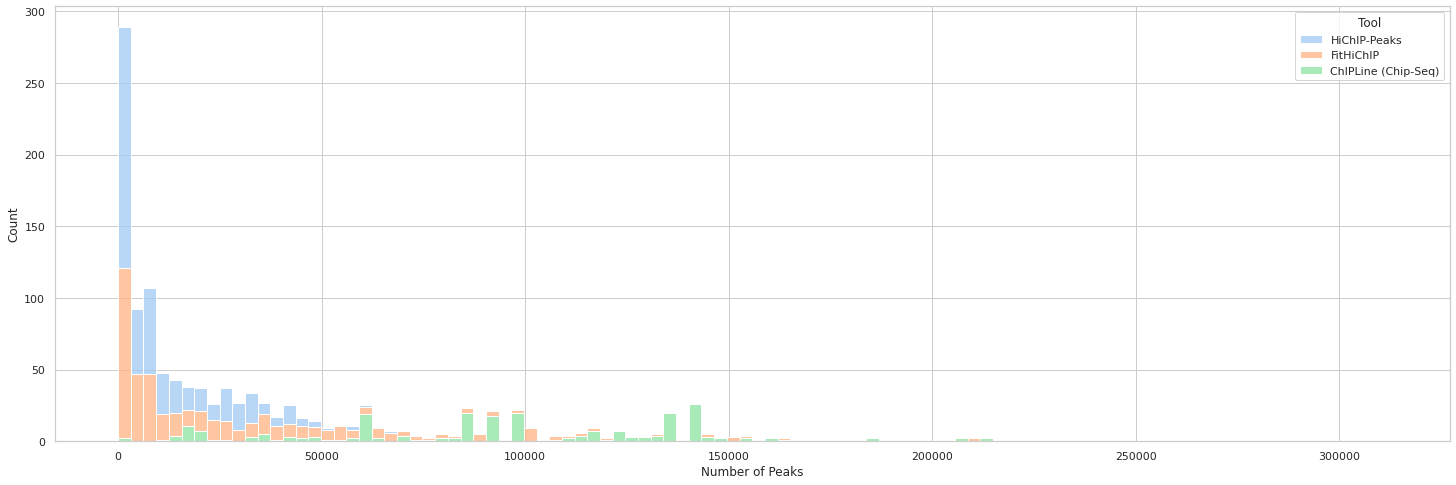

In [84]:
sns.set(rc = {'figure.figsize':(25,8)})
sns.set_theme(style="whitegrid")
sns.histplot(data=com_df, bins=100, x="Number of Peaks", hue='Tool', multiple="stack", palette='pastel')

<AxesSubplot:xlabel='Number of Peaks', ylabel='Count'>

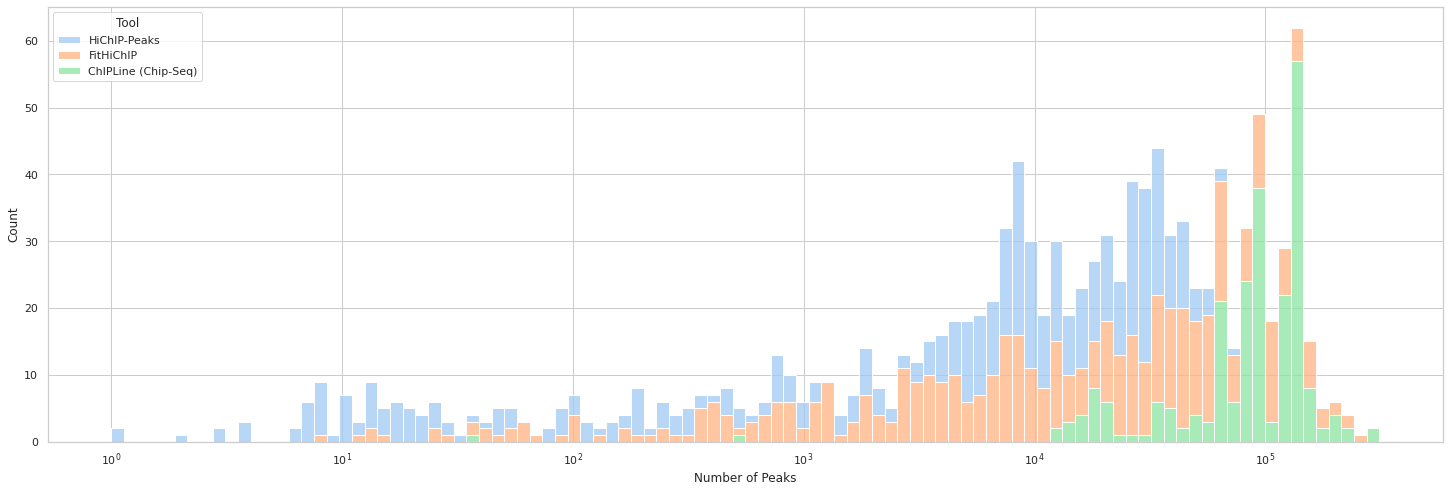

In [85]:
sns.set(rc = {'figure.figsize':(25,8)})
sns.set_theme(style="whitegrid")
sns.histplot(data=com_df, bins=100, x="Number of Peaks", hue='Tool', log_scale=True, multiple="stack", palette='pastel')

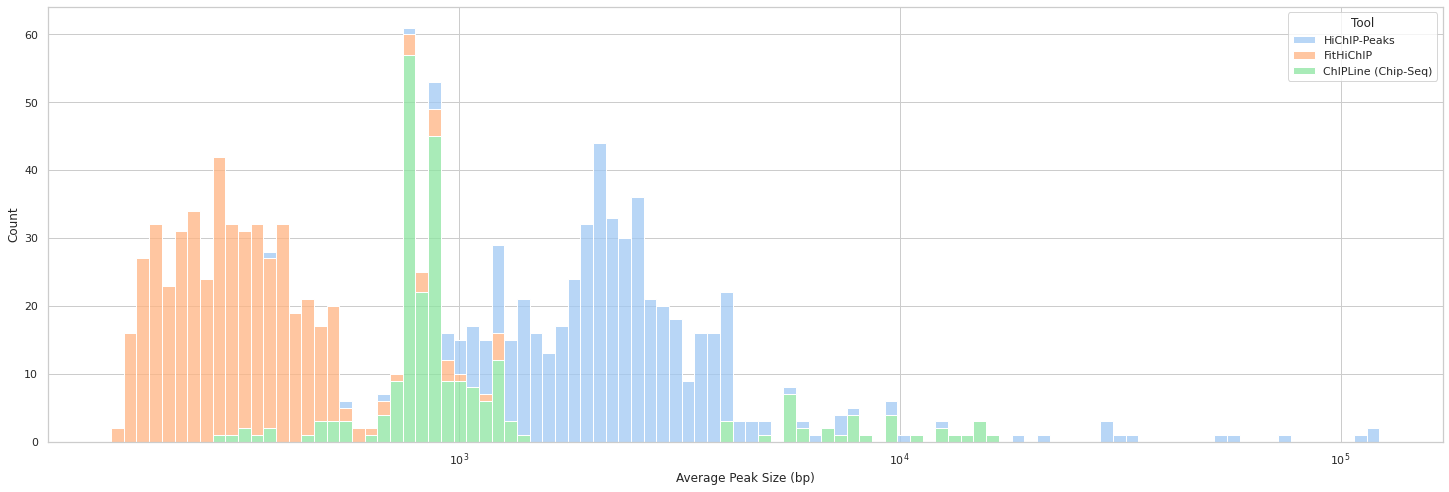

In [86]:
sns.set(rc = {'figure.figsize':(25,8)})
sns.set_theme(style="whitegrid")
ax = sns.histplot(data=com_df, bins=100, x="Average Peak Size (bp)", hue='Tool', log_scale=True, multiple="stack", palette='pastel')
fig = ax.get_figure()
fig.savefig('peak_size_tool_compare.png', dpi=300)

<AxesSubplot:xlabel='Average Peak Size (bp)', ylabel='Count'>

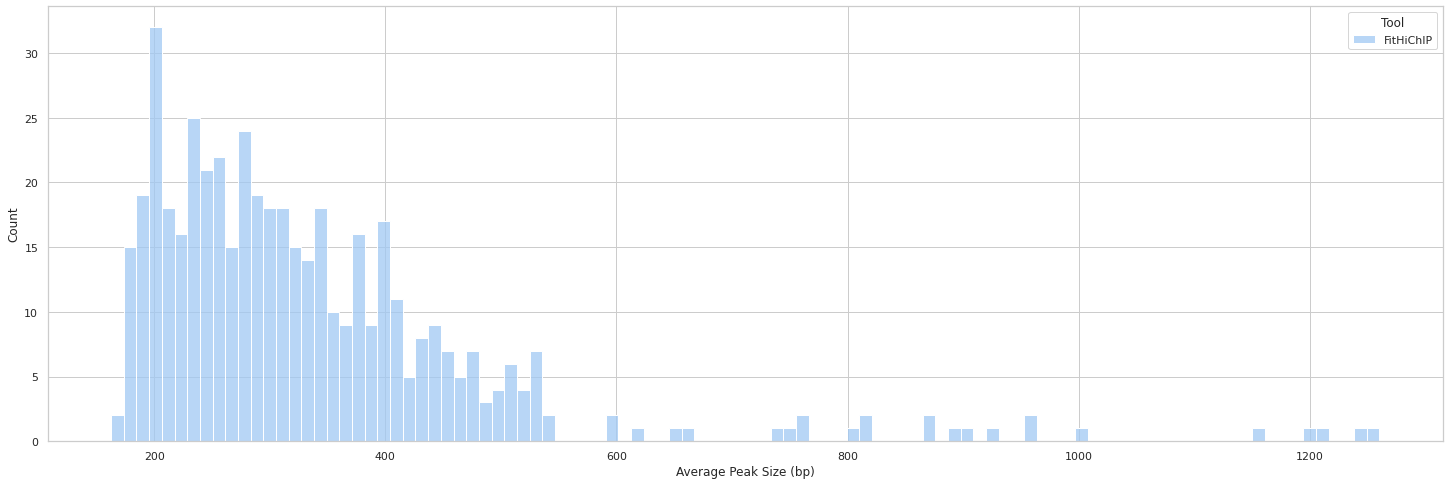

In [41]:
sns.set(rc = {'figure.figsize':(25,8)})
sns.set_theme(style="whitegrid")
sns.histplot(data=fithichip, bins=100, x="Average Peak Size (bp)", hue='Tool', log_scale=False, multiple="stack", palette='pastel')

<AxesSubplot:xlabel='Average Peak Size (bp)', ylabel='Count'>

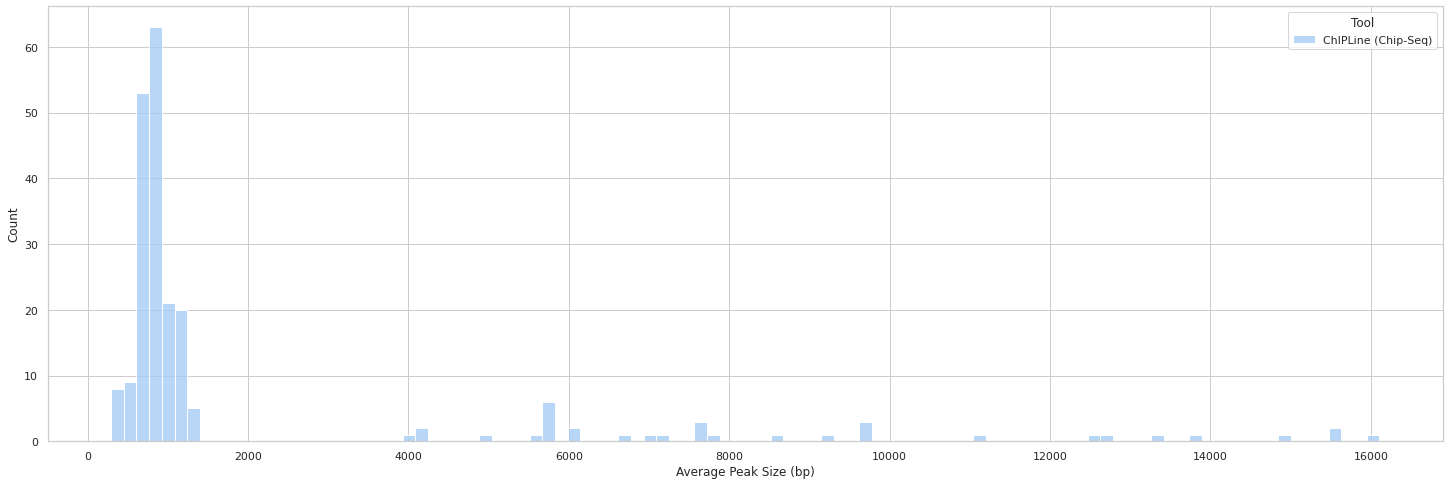

In [42]:
sns.set(rc = {'figure.figsize':(25,8)})
sns.set_theme(style="whitegrid")
sns.histplot(data=chipseq, bins=100, x="Average Peak Size (bp)", hue='Tool', log_scale=False, multiple="stack", palette='pastel')

<AxesSubplot:xlabel='Average Peak Size (bp)', ylabel='Count'>

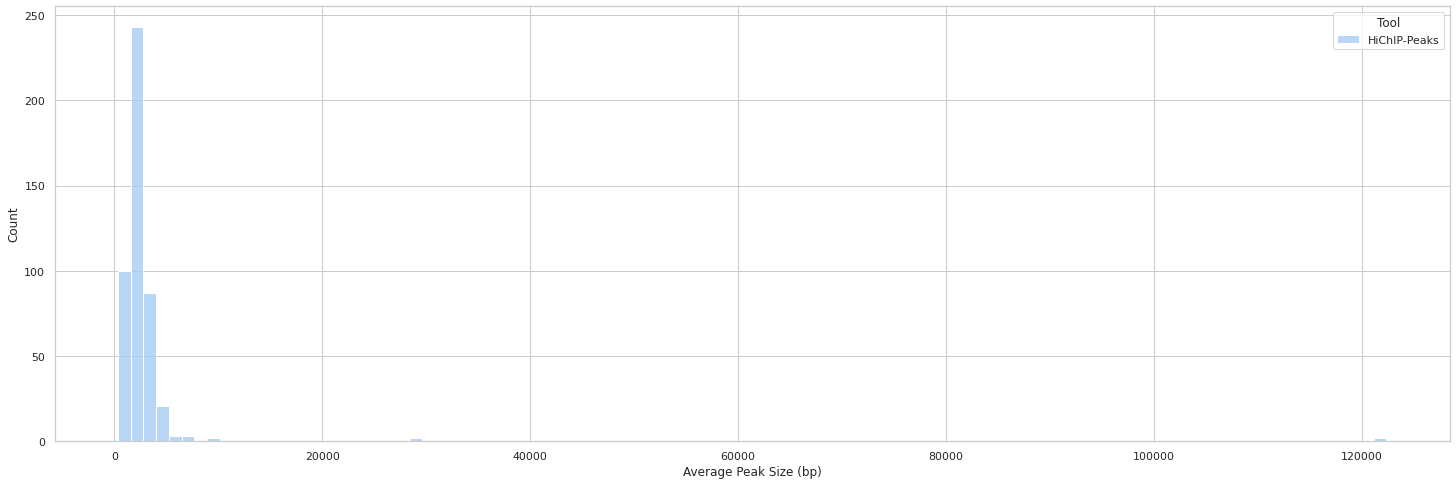

In [43]:
sns.set(rc = {'figure.figsize':(25,8)})
sns.set_theme(style="whitegrid")
sns.histplot(data=hichip_peaks, bins=100, x="Average Peak Size (bp)", hue='Tool', log_scale=False, multiple="stack", palette='pastel')

# Peaks Overlap Analysis

In [8]:
def read_overlap_files(file):
    tot_overlaps = 0
    cshp_overlaps = 0
    csf_overlaps = 0
    chip_w_overlap = []
    chip_w_overlap_no_dups = []
    with open(file) as fr:
        for line in fr:
            if line.startswith('c'):     
                info = line.strip().split()
                tot_overlaps = tot_overlaps + 1
                if info[3] == '1' or (len(info) > 11 and info[10] == '1'):
                    cshp_overlaps = cshp_overlaps + 1
                if info[3] == '2' or (len(info) > 11 and info[10] == '2'):
                    csf_overlaps = csf_overlaps + 1
                chip_w_overlap.append(info[0:3])
        for peak in chip_w_overlap:
            if peak not in chip_w_overlap_no_dups:
                chip_w_overlap_no_dups.append(peak)
    return(tot_overlaps, cshp_overlaps, csf_overlaps, chip_w_overlap)

In [11]:
def create_overlaps_df():
    data = []
    glob_str = 'results/peaks/overlaps/no_slop/*'
    
    for file in glob.glob(glob_str):
        sample_name = file.split('/')[4].split('.overlaps')[0]
        sample_info = []
        sample_info.append(sample_name)
        chipseq_file = get_chipseq_path('results/samplesheets/post-hicpro/peaks_files.samplesheet_1.without_header.tsv', sample_name)
        
        ## read overlaps file
        if os.path.exists(file):
            tot_overlaps, cshp_overlaps, csf_overlaps, chip_w_overlap  = read_overlap_files(file)
            chipseq_peaks = read_chipseq_files(chipseq_file)
            tot_chipseq = len(chipseq_peaks)
            
            sample_info.append(tot_overlaps)
            sample_info.append(cshp_overlaps)
            sample_info.append(csf_overlaps)
            sample_info.append(cshp_overlaps / tot_overlaps * 100)
            sample_info.append(csf_overlaps / tot_overlaps * 100)
            
            sample_info.append(tot_chipseq)
            sample_info.append(chip_w_overlap)
        
        data.append(sample_info)
            
    df = pd.DataFrame(data)
    return df

In [ ]:
overlaps_df = create_overlaps_df()
overlaps_df.columns = ['sample_name', '# Overlaps btwn CS and (HP or F)', '# Overlaps btwn CS and HP', '# Overlaps btwn CS and F', '% HP', '% F', 'Total Chip-seq', 'Chip w Overlaps']
overlaps_df = overlaps_df.sort_values(by=['% F'], ascending=False).reset_index(drop=True)
overlaps_df

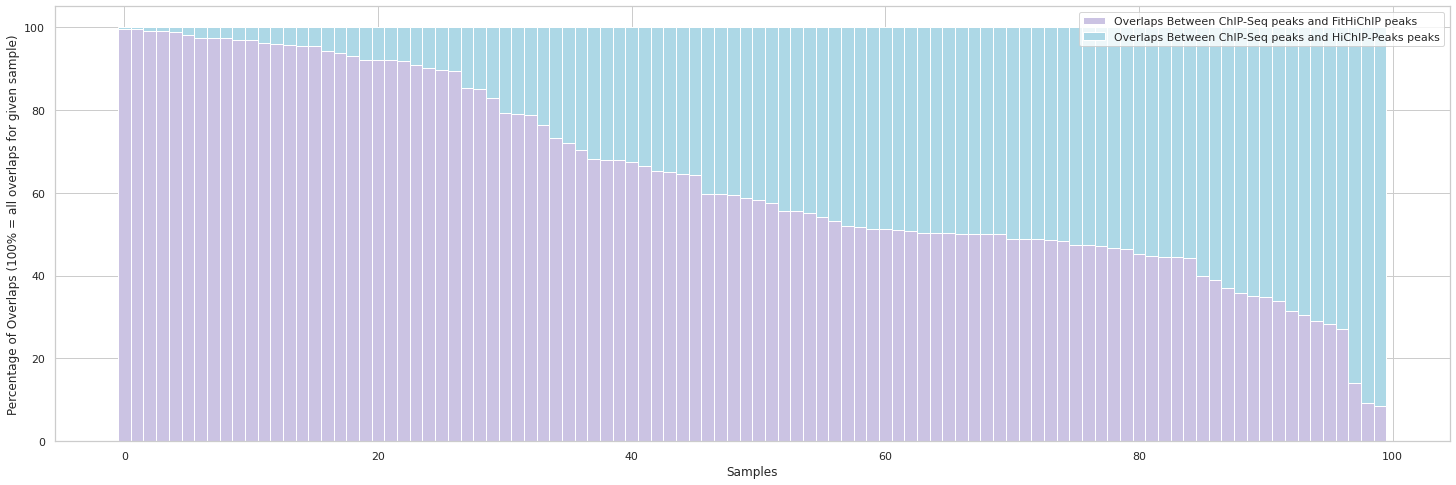

In [114]:
labels = overlaps_df.index
cs_hp = overlaps_df['% HP'].to_list()
cs_f = overlaps_df['% F'].to_list()
width = 1       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, cs_f, width, label='Overlaps Between ChIP-Seq peaks and FitHiChIP peaks', color='#CBC3E3')
ax.bar(labels, cs_hp, width, bottom=cs_f, label='Overlaps Between ChIP-Seq peaks and HiChIP-Peaks peaks', color='#ADD8E6')

ax.set_ylabel('Percentage of Overlaps (100% = all overlaps for given sample)')
ax.set_xlabel('Samples')
ax.legend()

plt.show()

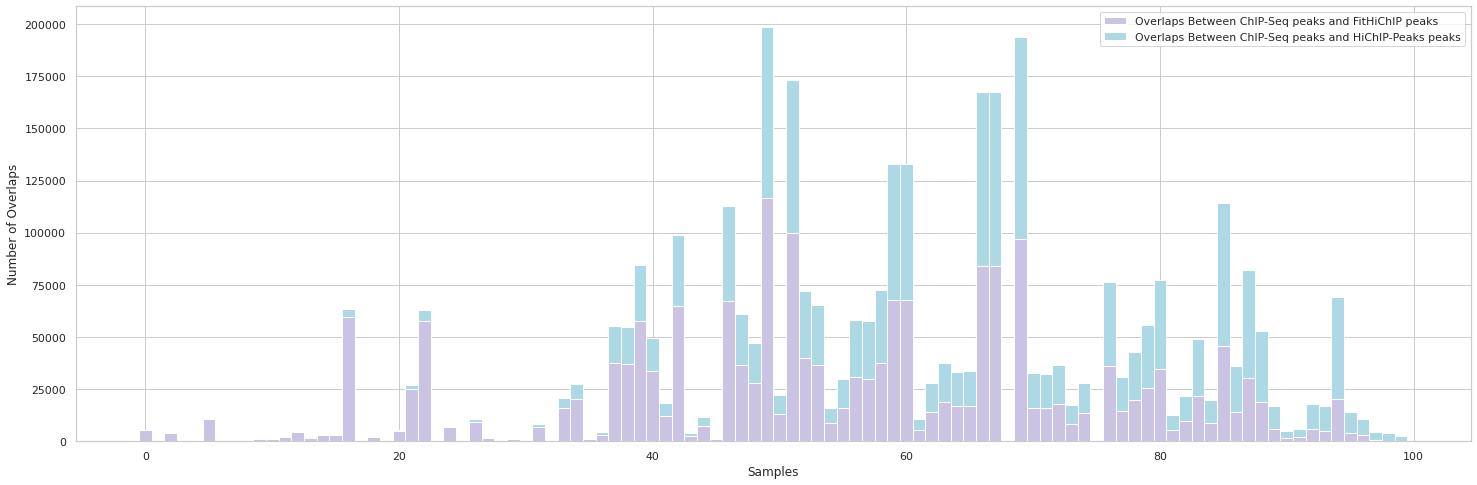

In [115]:
labels = overlaps_df.index
cs_hp = overlaps_df['# Overlaps btwn CS and HP'].to_list()
cs_f = overlaps_df['# Overlaps btwn CS and F'].to_list()
width = 1       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, cs_f, width, label='Overlaps Between ChIP-Seq peaks and FitHiChIP peaks', color='#CBC3E3')
ax.bar(labels, cs_hp, width, bottom=cs_f, label='Overlaps Between ChIP-Seq peaks and HiChIP-Peaks peaks', color='#ADD8E6')

ax.set_ylabel('Number of Overlaps')
ax.set_xlabel('Samples')
ax.legend()

plt.show()

In [5]:
def generate_df():
    data = []
    glob_str = 'ref_genome/results/hicpro/*/hic_results'
    
    for file in glob.glob(glob_str):
        sample_name = file.split('/')[3]
        sample_info = []
        sample_info.append(sample_name)
            
        ## FitHiChIP peaks
        fithichip_path='ref_genome/results/peaks/fithichip/{sn}/MACS2_ExtSize/out_macs2_peaks.narrowPeak'.format(sn = sample_name)
        if os.path.exists(fithichip_path):
            peak_info = read_peak_files(fithichip_path)
            sample_info.append(len(peak_info))
            peak_sizes = []
            for peak in peak_info.items():
                peak_sizes.append(int(int(peak[1][2])-int(peak[1][1])))
            sample_info.append(np.mean(peak_sizes))
        else:
            sample_info.append(0)
            sample_info.append(0)
            
        ## FitHiChIP peaks
        fithichip_path='results/peaks/fithichip/{sn}/MACS2_ExtSize/out_macs2_peaks.narrowPeak'.format(sn = sample_name)
        if os.path.exists(fithichip_path):
            peak_info = read_peak_files(fithichip_path)
            sample_info.append(len(peak_info))
            peak_sizes = []
            for peak in peak_info.items():
                peak_sizes.append(int(int(peak[1][2])-int(peak[1][1])))
            sample_info.append(np.mean(peak_sizes))
        else:
            sample_info.append(0)
            sample_info.append(0)
            
        data.append(sample_info)
    df = pd.DataFrame(data)
    return df

In [6]:
df = generate_df()

/mnt/BioHome/kfetter/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/mnt/BioHome/kfetter/.local/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [7]:
cols = ["sample_name", "num_peaks_chm13", "avg_peak_size_chm13", "num_peaks_hg38", "avg_peak_size_hg38"]
df.columns = cols
df.sort_values(by="sample_name", ascending=True).reset_index(drop=True)

,sample_name,num_peaks_chm13,avg_peak_size_chm13,num_peaks_hg38,avg_peak_size_hg38
0,293T-PDS.GSE128106.Homo_Sapiens.YY1.b1,29904,174.480972,29430,174.444852
1,293T-TMPYP4.GSE128106.Homo_Sapiens.YY1.b1,74311,188.027708,73184,187.952298
2,293T.GSE128106.Homo_Sapiens.YY1.b1,1003,181.174477,987,183.697062
3,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,11369,265.514117,11489,265.430151
4,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,10285,255.936315,10428,255.292386
5,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,7653,265.445838,7761,265.823734
6,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,23178,247.086548,23228,247.107327
7,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,8772,206.776106,9018,207.311377
8,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,27647,216.251384,27484,216.063164
9,A673_SA1m1.GSE133227.Homo_Sapiens.CTCF.b1,60043,390.155039,60295,386.202189


In [8]:
len(df.loc[df['num_peaks_chm13'] > df['num_peaks_hg38']])

236

In [11]:
df.describe()

,num_peaks_chm13,avg_peak_size_chm13,num_peaks_hg38,avg_peak_size_hg38
count,486.000000,483.000000,486.000000,483.000000
mean,31207.318930,342.238481,31034.024691,321.473069
std,41396.144357,163.912930,42340.595471,145.025820
min,0.000000,160.833333,0.000000,0.000000
25%,3097.000000,234.549609,2588.750000,230.617565
50%,13028.500000,302.404832,11811.000000,294.431053
75%,44131.250000,398.042910,44075.500000,387.553921
max,232305.000000,1263.363536,256996.000000,1001.919823


In [10]:
def generate_df():
    data = []
    glob_str = 'results/peaks/fithichip_macs3/*/'
    
    for file in glob.glob(glob_str):
        sample_name = file.split('/')[3]
        sample_info = []
        sample_info.append(sample_name)
            
        ## FitHiChIP peaks
        fithichip_path='results/peaks/fithichip_macs3/{sn}/MACS3_ExtSize/out_macs3_peaks.narrowPeak'.format(sn = sample_name)
        if os.path.exists(fithichip_path):
            peak_info = read_peak_files(fithichip_path)
            sample_info.append(len(peak_info))
            peak_sizes = []
            for peak in peak_info.items():
                peak_sizes.append(int(int(peak[1][2])-int(peak[1][1])))
            sample_info.append(np.mean(peak_sizes))
        else:
            sample_info.append(0)
            sample_info.append(0)
            
        ## FitHiChIP peaks
        fithichip_path='results/peaks/fithichip_macs3/{sn}/MACS2_ExtSize/out_macs2_peaks.narrowPeak'.format(sn = sample_name)
        if os.path.exists(fithichip_path):
            peak_info = read_peak_files(fithichip_path)
            sample_info.append(len(peak_info))
            peak_sizes = []
            for peak in peak_info.items():
                peak_sizes.append(int(int(peak[1][2])-int(peak[1][1])))
            sample_info.append(np.mean(peak_sizes))
        else:
            sample_info.append(0)
            sample_info.append(0)
            
        data.append(sample_info)
    df = pd.DataFrame(data)
    return df

In [11]:
df = generate_df()

In [13]:
cols = ["sample_name", "num_peaks_macs3", "avg_peak_size_macs3", "num_peaks_macs2", "avg_peak_size_macs2"]
df.columns = cols
df.sort_values(by="sample_name").reset_index(drop=True)

,sample_name,num_peaks_macs3,avg_peak_size_macs3,num_peaks_macs2,avg_peak_size_macs2
0,MLL_AF9.GSE110898.Mus_Musculus.H3K27ac.b1,4107,315.846847,4038,316.860079
1,MLL_AF9_LSD1i.GSE110898.Mus_Musculus.H3K27ac.b1,9084,391.508036,8921,392.768187
2,mES_100k.GSE101498.Mus_Musculus.H3K27ac.b1,26272,272.952573,20591,278.811568
3,mES_100k.GSE101498.Mus_Musculus.H3K27ac.b2,2467,214.674909,1920,218.143750
4,mES_25m.GSE101498.Mus_Musculus.H3K27ac.b1,62016,358.025300,51987,371.281455
5,mES_25m.GSE101498.Mus_Musculus.H3K27ac.b2,71662,360.520318,59917,372.748102
6,mES_500k.GSE101498.Mus_Musculus.H3K27ac.b1,31814,275.947067,26533,281.682019
7,mES_500k.GSE101498.Mus_Musculus.H3K27ac.b2,34789,278.186122,29073,283.141059
8,mES_50k.GSE101498.Mus_Musculus.H3K27ac.b1,3922,228.217236,3186,230.523540
9,mES_50k.GSE101498.Mus_Musculus.H3K27ac.b2,13947,257.904065,10625,261.957741
